Preprocesamiento
=========================
Antes de realizar cualquier algoritmo de IA, es necesario tener un conjunto de datos adecuado. En la realidad esto es complicado, por lo que se suelen aplicar diferentes técnicas que nos permitan limpiar la información.

Cargar datos
=========================
Para cargar datasets, utilizamos la libería pandas, esta nos permite cargar archivos .txt, .xls, .csv, entre otros.

In [2]:
import pandas as pd

# Cargamos el dataset
dataset = pd.read_csv('./datasets/data.csv')

# Seleccionamos las columnas que nos interesan
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 3].values

In [3]:
# Datos de entrada
pd.DataFrame(X) 

,0,1,2
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [4]:
# Datos de salida
pd.DataFrame(Y) 

,0
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


Valores nulos
=========================
Muchas ocasiones nuestros datasets suelen tener algunos datos incompletos, por lo que tenemos dos opciones: eliminamos el registro o rellenamos con algún criterio. 
* Si eliminamos, perdemos información de casos que pudieran ser relevantes y perder precisión en el modelo. 
* En cambio, cuando rellenamos, es posible que tengamos sesgo en los datos pero en mucha menor medida, por lo que suele ser una mejor opción. Para esto podemos utilizar la media, moda o mediana, e incluso asignar una constante.

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X[:, 1:3])

X[:, 1:3] = imputer.transform(X[:, 1:3])

Datos categóricos
=========================
A veces los datos que obtenemos tienen variables del tipo "talla", "país", "positivo", "negativo". Aquí surgen dos problemas:
* Las computadoras solo entienden números y no podemos pasarle texto, para ello se suele codificar la variable, asignando valores como "chica" -> 0, "mediana" -> 1 y "grande" -> 2. Estas categorías se llaman *ordinales*.
* Categorías como "país" no tienen una jerarquía y no podemos asignarle valores que tengan orden porque el modelo pensaría que algo vale más que otra cosa, para ello se crean columnas *dummy* que nos indican en lugar de "México" algo como "¿Es México?". A estas categorías se les conoce como *nominales*.

In [6]:
from sklearn.preprocessing import LabelEncoder

# Codificamos los valores ordinales para la columa 0 (país)
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

# Codificamos los valores ordinales para la columa 3 (compra)
# En este caso no es necesario transformar los valores a nominales dado que solo hay 2 categorías: Si y No -> 1 y 0
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

In [7]:
# Datos de entrada ordinales
pd.DataFrame(X) 

,0,1,2
0,0,44.0,72000.0
1,2,27.0,48000.0
2,1,30.0,54000.0
3,2,38.0,61000.0
4,1,40.0,63777.777778
5,0,35.0,58000.0
6,2,38.777778,52000.0
7,0,48.0,79000.0
8,1,50.0,83000.0
9,0,37.0,67000.0


In [8]:
# Datos de salida ordinales
pd.DataFrame(Y)

,0
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,0
9,1


In [9]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Para transformar los valores ordinales a nominales, usamos la clase ColumnTransformer
# que nos permite aplicar una transformación a una columna en concreto indícandole el índice
ct = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)

# Algo que debemos tener en cuenta es que estamos generando combinaciones con estas variables y vamos a redundar con alguna, ejemplo:

# 1, 0, 0 -> Francia
# 0, 1, 0 -> Alemania
# 0, 0, 1 -> España

# Si descartamos una, podemos tener
# 1, 0 -> Francia
# 0, 1 -> Alemania
# 0, 0 -> España

# De esta manera obtenemos mejores resultados


In [10]:
# Datos de entrada nominales
pd.DataFrame(X)

,0,1,2,3,4
0,1.0,0.0,0.0,44.0,72000.0
1,0.0,0.0,1.0,27.0,48000.0
2,0.0,1.0,0.0,30.0,54000.0
3,0.0,0.0,1.0,38.0,61000.0
4,0.0,1.0,0.0,40.0,63777.777778
5,1.0,0.0,0.0,35.0,58000.0
6,0.0,0.0,1.0,38.777778,52000.0
7,1.0,0.0,0.0,48.0,79000.0
8,0.0,1.0,0.0,50.0,83000.0
9,1.0,0.0,0.0,37.0,67000.0


Escalamiento
=========================
Otro problema que hay con los datos es la escala en que se encuentran. Por ejemplo, si tenemos como variables edad y salario, hay mucha diferencia entre los valores que pueden tomar y por ende, el modelo podría asignar más peso a una variable y menos a otra, sesgando los resultados. Entre las técnicas más comunes para eliminar esto están:

* Escalado estándar $\frac{x_i - \hat{x}}{\sigma}$
* Escalado min-max $\frac{x_i - min(x)}{max(x) - min(x)}$
* Escalado robusto $\frac{x_i - Q_1(x)}{Q_3(x) - Q_1(x)}$

In [11]:
from sklearn.preprocessing import StandardScaler

# Escalamos los valores usando un escalamiento estandar
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

Correlación
=========================
Un problema menos frecuente pero igual de relevante es que las variables pueden tener poca relación entre si y afectar al modelo negativamente. Por ejemplo, si queremos predecir el salario de una persona, podríamos tener como variables "edad" y "se lava los dientes", pero claramente es irrelevante este segundo dato ya que no aporta nada y está muy fuera de lugar. Existen diferentes métricas para evaluar la correlación entre variables, pero el más usado es el coeficiente de correlación de *Pearson* $r = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$ (es necesario tener una distribución normal de datos).
Gráficamente, para el caso de una correlación linea buscamos que los datos de 2 variables formen una recta entre si. Por ejemplo:
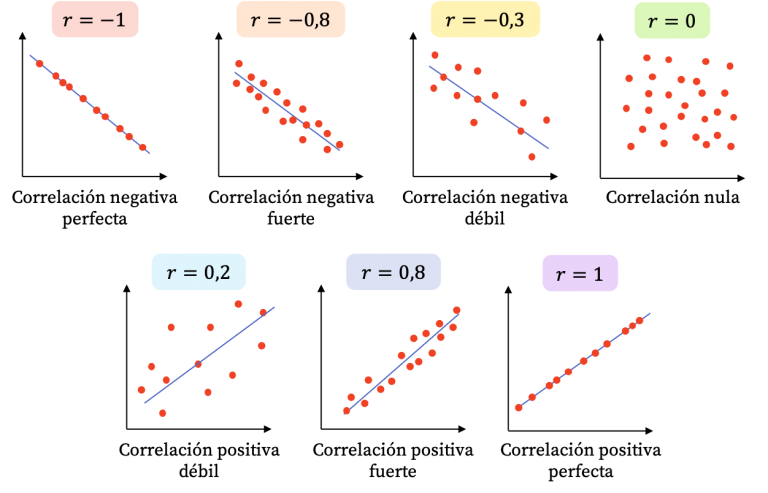

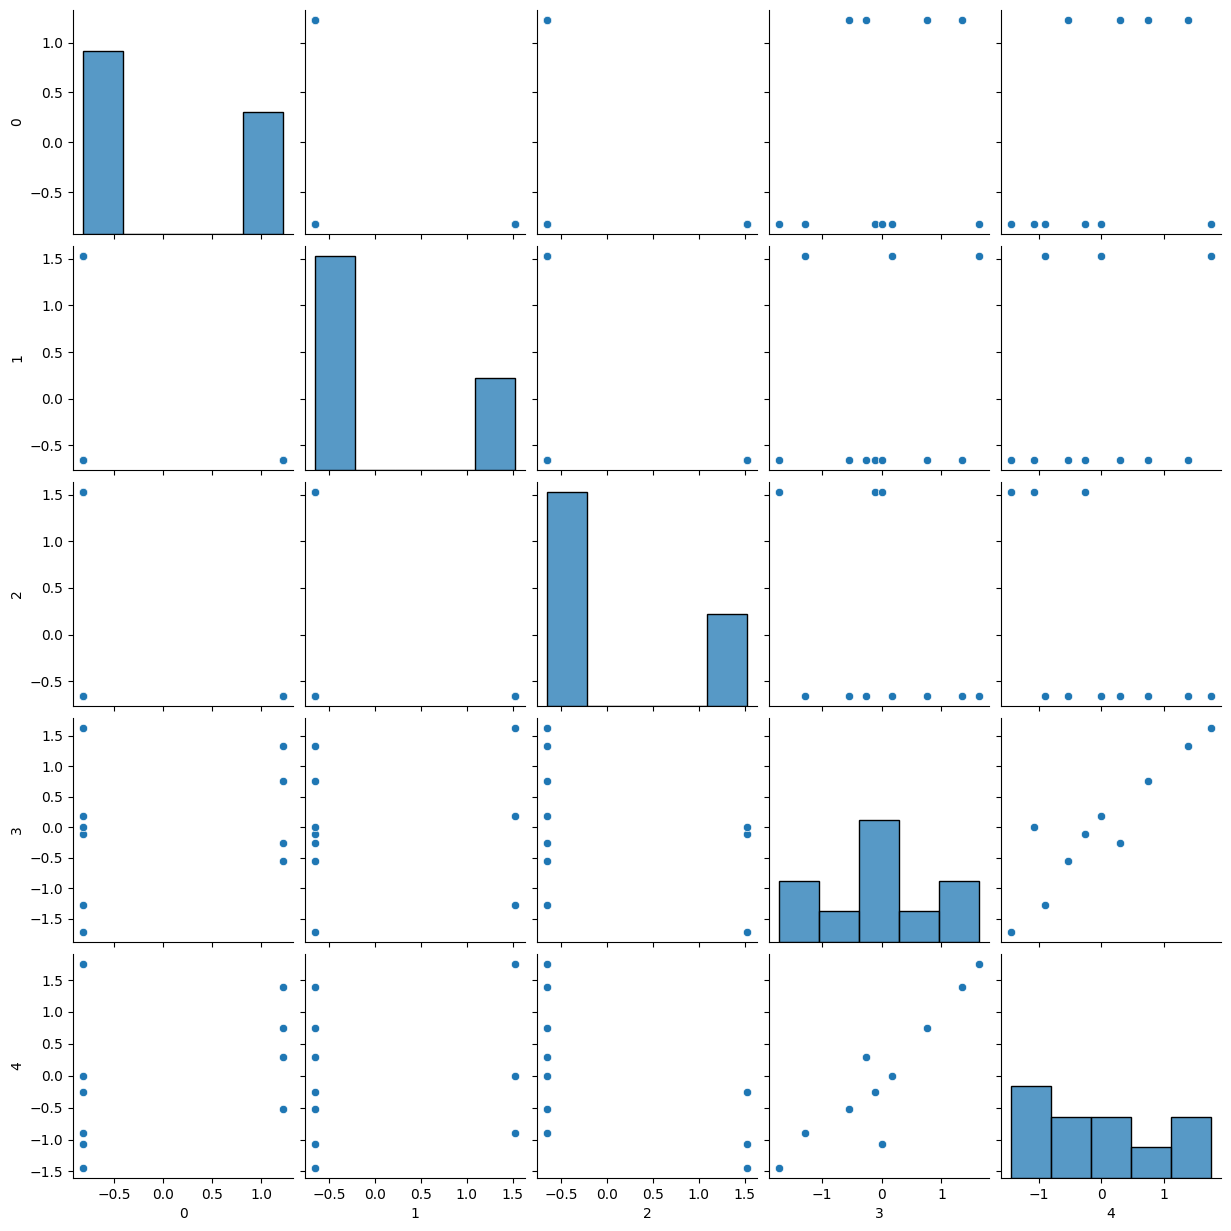

In [12]:
import seaborn as sns
# Con este tipo de gráfico podemos analizar la relación entre todas las variables y ver si hay alguna correlación entre ellas
# En la diagonal comparamos la distribución de los datos de cada variable con una distribución normal
# Cabe aclarar que no buscamos relaciones entre las variables categóricas, solo entre las numéricas
sns.pairplot(pd.DataFrame(X))

Balanceo de datos
=========================
El último problema que abordaremos es el balanceo de datos (esto aplica más para problemas de clasificación). En ocasiones nuestros datos categóricos tendrán una distribución desigualada que ignorando valores en específico podemos obtener una alta precisión (claramente falsa). Para ello tenemos dos enfoques:

* *Oversampling*, duplicar datos para alcanzar la cantidad de la categoría mayor.
    * Random: aleatoriamente duplicamos valores.
    * Smote: crea artificialmente datos buscando variedad.
* *Undersampling*, eliminar datos para alcanzar la cantidad de la categoría menor.
    * Random: aleatoriamente eliminamos valores.
    * Nearmiss: se eliminan los valores más parecidos entre si.

In [13]:
import imblearn as imb
from imblearn.over_sampling import SMOTE

# Para balancear los datos, usamos la técnica de SMOTE
sm = SMOTE(random_state=40)
X, Y = sm.fit_resample(X, Y)

In [14]:
# Datos de entrada balanceados
pd.DataFrame(X)

,0,1,2,3,4
0,1.224745,-0.654654,-0.654654,0.758874,7.494733e-01
1,-0.816497,-0.654654,1.527525,-1.711504,-1.438178e+00
2,-0.816497,1.527525,-0.654654,-1.275555,-8.912655e-01
3,-0.816497,-0.654654,1.527525,-0.113024,-2.532004e-01
4,-0.816497,1.527525,-0.654654,0.177609,6.632192e-16
5,1.224745,-0.654654,-0.654654,-0.548973,-5.266569e-01
6,-0.816497,-0.654654,1.527525,0.000000,-1.073570e+00
7,1.224745,-0.654654,-0.654654,1.340140,1.387538e+00
8,-0.816497,1.527525,-0.654654,1.630773,1.752147e+00
9,1.224745,-0.654654,-0.654654,-0.258340,2.937125e-01


In [15]:
# Datos de salida balanceados
pd.DataFrame(Y)

,0
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,0
9,1


División
=========================
Buscando generalizar el modelo, la idea es crear conjuntos de entrenamiento y de prueba, el primero nos sirve para generar el modelo, mientras que el segundo nos ayuda a evaluar la precisión de este.

In [16]:
from sklearn.model_selection import train_test_split

# Generalmente se usa un 80% para entrenamiento y un 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [17]:
# Datos de entrada de entrenamiento
pd.DataFrame(X_train)

,0,1,2,3,4
0,-0.816497,1.527525,-0.654654,0.177609,6.632192e-16
1,1.224745,-0.654654,-0.654654,-0.258340,2.937125e-01
2,-0.816497,-0.654654,1.527525,-1.711504,-1.438178e+00
3,-0.816497,-0.654654,1.527525,0.000000,-1.073570e+00
4,1.224745,-0.654654,-0.654654,1.340140,1.387538e+00
5,-0.816497,-0.654654,1.527525,-0.113024,-2.532004e-01
6,1.224745,-0.654654,-0.654654,0.758874,7.494733e-01
7,1.224745,-0.654654,-0.654654,-0.548973,-5.266569e-01


In [18]:
# Datos de salida de entrenamiento
pd.DataFrame(y_train)

,0
0,1
1,1
2,1
3,0
4,1
5,0
6,0
7,1


In [19]:
# Datos de entrada de prueba
pd.DataFrame(X_test)

,0,1,2,3,4
0,-0.816497,1.527525,-0.654654,-1.275555,-0.891265
1,-0.816497,1.527525,-0.654654,1.630773,1.752147


In [20]:
# Datos de salida de prueba
pd.DataFrame(y_test)

,0
0,0
1,0
